In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [48]:
tokenizer = Tokenizer()

data = "Those negative emotions he had slowly disappeared. He felt that this reincarnation was a turning point that would interminably change his life!Indeed, from the perspective of Jiang Chen’s past life, the identity of the son of an ordinary noble was completely inconsequential.But even the lowliest person possessed one quality that he did not in his past life, and that was the qualification to train!The qualification to train was like the starting line of a race.Although he was an eminent person in his past life, as lofty as dragons and phoenixes, he could only watch on the sidelines.Now, despite his commonness in his current life, despite being like an ant, he had the qualification to step up to the starting line and take his place.The path of training was ceaseless and boundless. As long as one had good fortune, one could transform and become all powerful. Even wings could be stuck onto ants for them to soar in the heavens!And now, an opportunity had come!Son of the Celestial Emperor, Keeper of the Tianlang Library. He had devoted his millions years of life almost entirely to studying. It would be no exaggeration to say that he was a walking encyclopedia and grasped the world’s knowledge.His belly full of theories spanning from the divine heavens to common dirt, there was no topic that Jiang Chen was unfamiliar with.Although Jiang Chen could not train in the many boring years in his past life, he loved to take in disciples and conduct experiments with them, testing out one theory or another.He’d lost track of how many prodigies he’d created in his lifetime.What was opportunity?"
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'was': 2, 'his': 3, 'of': 4, 'he': 5, 'to': 6, 'in': 7, 'and': 8, 'life': 9, 'that': 10, 'had': 11, 'past': 12, 'an': 13, 'one': 14, 'as': 15, 'could': 16, 'a': 17, 'jiang': 18, 'qualification': 19, 'train': 20, 'would': 21, 'from': 22, 'son': 23, 'even': 24, 'person': 25, 'not': 26, 'like': 27, 'starting': 28, 'line': 29, 'although': 30, 'now': 31, 'despite': 32, 'take': 33, 'be': 34, 'them': 35, 'heavens': 36, 'opportunity': 37, 'years': 38, 'no': 39, 'chen': 40, 'with': 41, 'many': 42, 'he’d': 43, 'those': 44, 'negative': 45, 'emotions': 46, 'slowly': 47, 'disappeared': 48, 'felt': 49, 'this': 50, 'reincarnation': 51, 'turning': 52, 'point': 53, 'interminably': 54, 'change': 55, 'indeed': 56, 'perspective': 57, 'chen’s': 58, 'identity': 59, 'ordinary': 60, 'noble': 61, 'completely': 62, 'inconsequential': 63, 'but': 64, 'lowliest': 65, 'possessed': 66, 'quality': 67, 'did': 68, 'race': 69, 'eminent': 70, 'lofty': 71, 'dragons': 72, 'phoenixes': 73, 'only': 74, 'watch': 75

In [49]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    
#pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [51]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(lr=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history = model.fit(xs, ys, epochs = 500, verbose = 1)

Train on 280 samples
Epoch 1/500
280/280 [==============================] - 3s 10ms/sample - loss: 4.9965 - accuracy: 0.0214
Epoch 2/500
280/280 [==============================] - 1s 3ms/sample - loss: 4.9821 - accuracy: 0.0464
Epoch 3/500
280/280 [==============================] - 1s 3ms/sample - loss: 4.9657 - accuracy: 0.0536
Epoch 4/500
280/280 [==============================] - 1s 3ms/sample - loss: 4.9315 - accuracy: 0.0357
Epoch 5/500
280/280 [==============================] - 1s 3ms/sample - loss: 4.8478 - accuracy: 0.0643
Epoch 6/500
280/280 [==============================] - 1s 3ms/sample - loss: 4.7282 - accuracy: 0.0393
Epoch 7/500
280/280 [==============================] - 1s 3ms/sample - loss: 4.6500 - accuracy: 0.0393
Epoch 8/500
280/280 [==============================] - 1s 3ms/sample - loss: 4.6040 - accuracy: 0.0536
Epoch 9/500
280/280 [==============================] - 1s 3ms/sample - loss: 4.5802 - accuracy: 0.0679
Epoch 10/500
280/280 [=============================

280/280 [==============================] - 1s 3ms/sample - loss: 2.9112 - accuracy: 0.3179
Epoch 80/500
280/280 [==============================] - 1s 3ms/sample - loss: 2.8838 - accuracy: 0.3321
Epoch 81/500
280/280 [==============================] - 1s 3ms/sample - loss: 2.8556 - accuracy: 0.3250
Epoch 82/500
280/280 [==============================] - 1s 3ms/sample - loss: 2.8304 - accuracy: 0.3429
Epoch 83/500
280/280 [==============================] - 1s 3ms/sample - loss: 2.8041 - accuracy: 0.3429
Epoch 84/500
280/280 [==============================] - 1s 3ms/sample - loss: 2.7837 - accuracy: 0.3429
Epoch 85/500
280/280 [==============================] - 1s 3ms/sample - loss: 2.7567 - accuracy: 0.3464
Epoch 86/500
280/280 [==============================] - 1s 3ms/sample - loss: 2.7376 - accuracy: 0.3679
Epoch 87/500
280/280 [==============================] - 1s 3ms/sample - loss: 2.7059 - accuracy: 0.3714
Epoch 88/500
280/280 [==============================] - 1s 3ms/sample - loss:

280/280 [==============================] - 1s 3ms/sample - loss: 1.3523 - accuracy: 0.8464
Epoch 158/500
280/280 [==============================] - 1s 4ms/sample - loss: 1.3373 - accuracy: 0.8536
Epoch 159/500
280/280 [==============================] - 1s 4ms/sample - loss: 1.3236 - accuracy: 0.8679
Epoch 160/500
280/280 [==============================] - 1s 4ms/sample - loss: 1.3073 - accuracy: 0.8607
Epoch 161/500
280/280 [==============================] - 1s 4ms/sample - loss: 1.2979 - accuracy: 0.8536
Epoch 162/500
280/280 [==============================] - 1s 4ms/sample - loss: 1.2798 - accuracy: 0.8714
Epoch 163/500
280/280 [==============================] - 1s 4ms/sample - loss: 1.2686 - accuracy: 0.8714
Epoch 164/500
280/280 [==============================] - 1s 3ms/sample - loss: 1.2557 - accuracy: 0.8786
Epoch 165/500
280/280 [==============================] - 1s 4ms/sample - loss: 1.2455 - accuracy: 0.8821
Epoch 166/500
280/280 [==============================] - 1s 3ms/sampl

280/280 [==============================] - 1s 3ms/sample - loss: 0.6289 - accuracy: 0.9857
Epoch 236/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.6203 - accuracy: 0.9893
Epoch 237/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.6150 - accuracy: 0.9893
Epoch 238/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.6089 - accuracy: 0.9893
Epoch 239/500
280/280 [==============================] - 1s 4ms/sample - loss: 0.6039 - accuracy: 0.9893
Epoch 240/500
280/280 [==============================] - 1s 4ms/sample - loss: 0.5987 - accuracy: 0.9893
Epoch 241/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.5922 - accuracy: 0.9893
Epoch 242/500
280/280 [==============================] - 1s 4ms/sample - loss: 0.5886 - accuracy: 0.9893
Epoch 243/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.5826 - accuracy: 0.9893
Epoch 244/500
280/280 [==============================] - 1s 4ms/sampl

280/280 [==============================] - 1s 4ms/sample - loss: 0.3204 - accuracy: 1.0000
Epoch 314/500
280/280 [==============================] - 1s 4ms/sample - loss: 0.3165 - accuracy: 1.0000
Epoch 315/500
280/280 [==============================] - 1s 4ms/sample - loss: 0.3154 - accuracy: 1.0000
Epoch 316/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.3141 - accuracy: 1.0000
Epoch 317/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.3104 - accuracy: 1.0000
Epoch 318/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.3108 - accuracy: 1.0000
Epoch 319/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.3078 - accuracy: 1.0000
Epoch 320/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.3013 - accuracy: 1.0000
Epoch 321/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.2992 - accuracy: 1.0000
Epoch 322/500
280/280 [==============================] - 1s 3ms/sampl

280/280 [==============================] - 1s 3ms/sample - loss: 0.1799 - accuracy: 1.0000
Epoch 392/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1782 - accuracy: 1.0000
Epoch 393/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1770 - accuracy: 1.0000
Epoch 394/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1749 - accuracy: 1.0000
Epoch 395/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1728 - accuracy: 1.0000
Epoch 396/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1718 - accuracy: 1.0000
Epoch 397/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1706 - accuracy: 1.0000
Epoch 398/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1698 - accuracy: 1.0000
Epoch 399/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1683 - accuracy: 1.0000
Epoch 400/500
280/280 [==============================] - 1s 3ms/sampl

280/280 [==============================] - 1s 3ms/sample - loss: 0.1082 - accuracy: 1.0000
Epoch 470/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1076 - accuracy: 1.0000
Epoch 471/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1071 - accuracy: 1.0000
Epoch 472/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1058 - accuracy: 1.0000
Epoch 473/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1052 - accuracy: 1.0000
Epoch 474/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1046 - accuracy: 1.0000
Epoch 475/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1043 - accuracy: 1.0000
Epoch 476/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1036 - accuracy: 1.0000
Epoch 477/500
280/280 [==============================] - 1s 3ms/sample - loss: 0.1035 - accuracy: 1.0000
Epoch 478/500
280/280 [==============================] - 1s 3ms/sampl

In [52]:
 import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

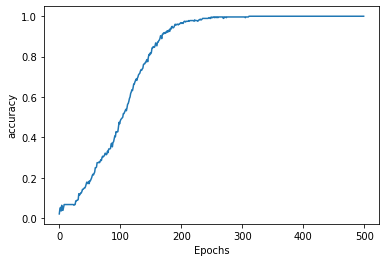

In [53]:
plot_graphs(history, "accuracy")

In [105]:
seed_text = 'What was opportunity'
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding = 'pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            seed_text += ' ' + word
print(seed_text)

What was opportunity that eminent he felt that
